In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# Loadind Dataset into df
df = pd.read_excel("interactions.xlsx")
df.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


## 1. Data Cleaning

In [15]:
# checking column names
df.columns

Index(['interactionID', 'fromEmailId', 'toEmailId', 'InteractionDate',
       'InteractionType(Call/Email/SMS)', 'Extracted Interaction Text'],
      dtype='object')

In [17]:
# Renaming Columns and Chaging to Snake Case
df.rename(columns={'interactionID': 'interaction_id',
                   'fromEmailId': 'from_email_id',
                   'toEmailId': 'to_email_id',
                   "InteractionDate": "interaction_date",
                   "InteractionType(Call/Email/SMS)": "interaction_type",
                   "Extracted Interaction Text": "interaction_text"},inplace=True)

In [27]:
# checking shape, null count, and data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316776 entries, 0 to 316775
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   interaction_id    316776 non-null  int64         
 1   from_email_id     316776 non-null  object        
 2   to_email_id       316776 non-null  object        
 3   interaction_date  316776 non-null  datetime64[ns]
 4   interaction_type  316776 non-null  object        
 5   interaction_text  316776 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.5+ MB


In [29]:
# Checking for Null Values
df.isna().sum()

interaction_id      0
from_email_id       0
to_email_id         0
interaction_date    0
interaction_type    0
interaction_text    0
dtype: int64

In [31]:
# checking Duplicate Values
df.duplicated().sum()

0

## 2. EDA

In [34]:
df.describe()

,interaction_id,interaction_date
count,3.167760e+05,316776
mean,5.497412e+06,2017-10-18 08:39:11.359951872
min,1.000070e+06,2016-01-04 00:00:00
25%,3.254082e+06,2016-11-26 00:00:00
50%,5.493879e+06,2017-10-19 00:00:00
75%,7.737752e+06,2018-09-10 00:00:00
max,9.999971e+06,2019-08-01 00:00:00
std,2.593770e+06,NaN


In [36]:
# checking value count of interaction_type column
df["interaction_type"].value_counts()

interaction_type
Email      172342
Call       115462
Meeting     28972
Name: count, dtype: int64

In [38]:
# checking value proportion of interaction_type column
df["interaction_type"].value_counts(normalize=True).round(2)

interaction_type
Email      0.54
Call       0.36
Meeting    0.09
Name: proportion, dtype: float64

In [42]:
# Splitting sales agent names from the email
df['email_username'] = df['from_email_id'].str.split('@').str[0]

In [120]:
# checking the number of distinct sales agents 
print("Total Unique Callers:",df["from_email_id"].nunique())

# Create a DataFrame with counts and percentages
call_counts = df["email_username"].value_counts()
call_percentages = df["email_username"].value_counts(normalize=True).mul(100).round(2)

# Combine counts and percentages into a single DataFrame
call_summary_df = pd.DataFrame({
    "call_count": call_counts,
    "percentage": call_percentages
}).reset_index()

# Rename the columns for clarity
call_summary_df.columns = ["agent", "call_count", "percentage"]
call_summary_df.head()

Total Unique Callers: 30


,agent,call_count,percentage
0,darcel,25736,8.12
1,vicki,16618,5.25
2,kary,16366,5.17
3,anna,15578,4.92
4,kami,13398,4.23


In [115]:
call_summary_df.describe()

,call_count,percentage
count,30.000000,30.000000
mean,10559.200000,3.333667
std,4293.535176,1.355626
min,3962.000000,1.250000
25%,7794.000000,2.462500
50%,9948.000000,3.140000
75%,12394.000000,3.915000
max,25736.000000,8.120000


### Agent Interaction Summary:
By analyzing the interaction counts and proportions of agents, we found that 30 agents had a total of 316,776 interactions. The interaction counts ranged from 3,962 to 25736, while the interaction proportions varied from 1.3% to 8.1%.

In [46]:
# Checking character lenght, word count and sentence count to get a deep idea about the emails

# importing required packages 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anikb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
# Calculate the number of characters in each interaction_text
df["number_of_characters"] = df["interaction_text"].apply(len)

# Calculate the number of words in each interaction_text
df["number_of_words"] = df["interaction_text"].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate the number of sentences in each interaction_text
df["number_of_sentences"] = df["interaction_text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [50]:
df.head(5)

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",kary,150,30,2
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,boris,121,24,1
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,darcel,46,12,1


In [52]:
# Checking descriptive statistics of the dataset
df.describe()

,interaction_id,interaction_date,number_of_characters,number_of_words,number_of_sentences
count,3.167760e+05,316776,316776.000000,316776.000000,316776.000000
mean,5.497412e+06,2017-10-18 08:39:11.359951872,197.938266,37.681128,2.318058
min,1.000070e+06,2016-01-04 00:00:00,16.000000,4.000000,1.000000
25%,3.254082e+06,2016-11-26 00:00:00,80.000000,16.000000,1.000000
50%,5.493879e+06,2017-10-19 00:00:00,164.000000,33.000000,2.000000
75%,7.737752e+06,2018-09-10 00:00:00,301.000000,58.000000,3.000000
max,9.999971e+06,2019-08-01 00:00:00,565.000000,103.000000,7.000000
std,2.593770e+06,NaN,137.663247,25.282674,1.422673


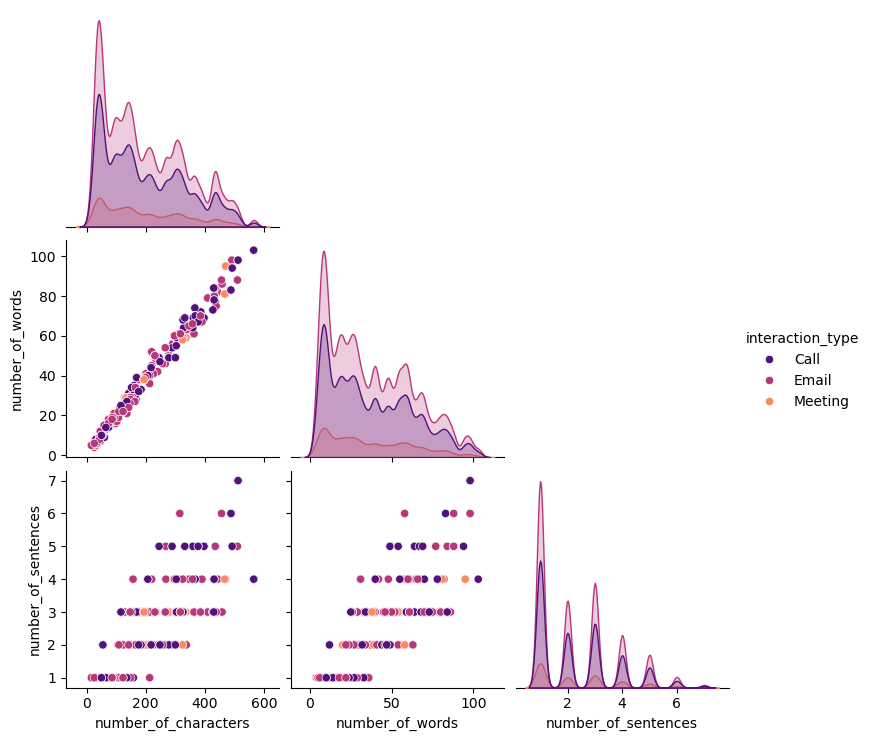

In [56]:
# Plot pairwise relationships between numeric features, grouped by interaction_type, excluding interaction_id.
sns.pairplot(df.drop(columns="interaction_id"), hue='interaction_type', palette='magma', corner=True)

### Interaction Type Summary:
We haven't seen significant findings by analyzing the number of characters, words, and sentences between different interaction types, but we will analyze further to see if sentiment types have any relation to the number of characters, words, and sentences.

### Text Preprocessing

In [58]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anikb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
def transform_text(text):
    
    # Convert text to lowercase
    text_lowercase = text.lower()
    
    # Tokenize the text into individual words
    word_tokens = nltk.word_tokenize(text_lowercase)
    
    # Keep only alphanumeric words
    word_tokens = [word for word in word_tokens if word.isalnum()]
    
    # Remove stopwords and punctuation
    cleaned_text = [word for word in word_tokens if word not in stopwords.words('english') and word not in string.punctuation]

    # Stemming words
    #stemmed_text = [ps.stem(word) for word in cleaned_text]
    
    # Join stemmed words back into a single string
    return " ".join(cleaned_text)

In [62]:
df["processed_text"] = df["interaction_text"].apply(transform_text)

In [64]:
df.head(3)

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,processed_text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5,thoroughly enjoyed presentation yesterday even...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2,speaking staff tremendous opportunity present ...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",kary,150,30,2,however unable join family obligations sure ha...


In [66]:
from wordcloud import WordCloud

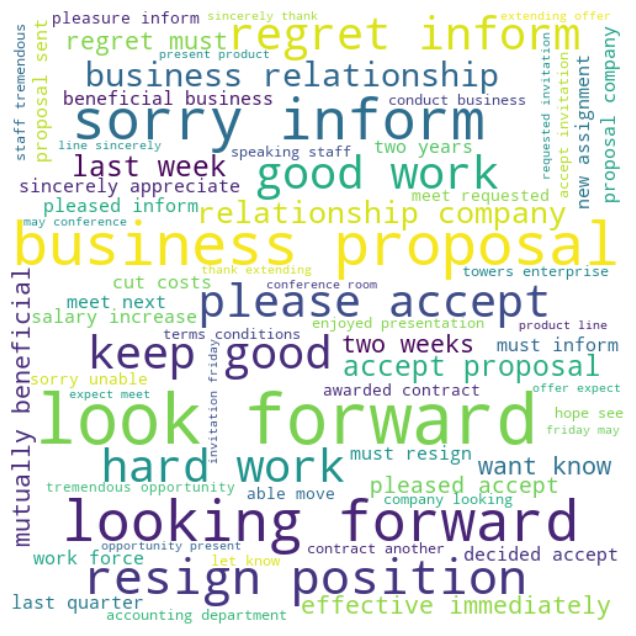

In [219]:
# Initialize the WordCloud object with desired parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

# Convert 'Processed_Text' to strings, and concatenate into a single text
text = df["processed_text"].str.cat(sep=" ")

# Generate the word cloud
text_wordcloud = wc.generate(text)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(text_wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

C:\Users\anikb\AppData\Local\Temp\ipykernel_16632\2067458368.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_20_spam_words, palette='viridis')


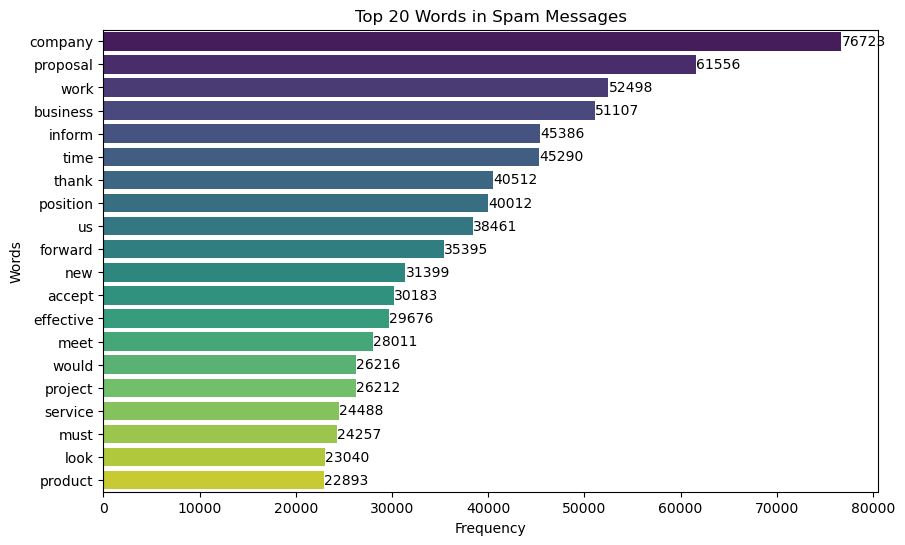

In [211]:
from collections import Counter

# Create a list of all words from spam messages
corpus = []
for msg in df['processed_text'].astype(str).tolist():
    for word in msg.split():
        corpus.append(word)
        
# Count word occurrences and convert to DataFrame
top_20_spam_words = pd.DataFrame(Counter(corpus).most_common(20), columns=['word', 'count'])

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_20_spam_words, palette='viridis')
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Add data labels to each bar
for index, value in enumerate(top_20_spam_words['count']):
    plt.text(value, index, str(value), va='center')
    
plt.show()

## EDA with Vader Model

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm.auto import tqdm
tqdm.pandas(desc="Processing Sentiment Analysis")

In [74]:
sia = SentimentIntensityAnalyzer()

In [76]:
# iloc converting series to string
#sia.polarity_scores(df[df['number_of_characters'] == df['number_of_characters'].max()]['processed_text'].iloc[0])
#df.loc[253837, 'interaction_text']

In [78]:
# Initialize an empty dictionary to store results
res = {}

# Iterate over the DataFrame and compute sentiment scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['interaction_text']  # Extract the text field
    res[i] = sia.polarity_scores(text)  # Use the index (i) as the key and store sentiment scores

# Convert the dictionary to a DataFrame
sentiment_df = pd.DataFrame.from_dict(res, orient='index')

  0%|          | 0/316776 [00:00<?, ?it/s]

In [80]:
# Merge sentiment scores back into the original DataFrame
df_with_sentiments = pd.concat([df, sentiment_df], axis=1)

# Display the updated DataFrame
df_with_sentiments.head()

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,processed_text,neg,neu,pos,compound
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5,thoroughly enjoyed presentation yesterday even...,0.039,0.722,0.238,0.9176
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2,speaking staff tremendous opportunity present ...,0.000,0.837,0.163,0.8126
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",kary,150,30,2,however unable join family obligations sure ha...,0.071,0.756,0.173,0.4287
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,boris,121,24,1,extremely sorry inform decided accept competit...,0.069,0.819,0.112,0.2516
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,darcel,46,12,1,think possible meet,0.000,1.000,0.000,0.0000


In [82]:
# Renaming Columns and Chaging to Snake Case
df_with_sentiments.rename(columns={'neg': 'vader_neg',
                   'neu': 'vader_neu',
                   'pos': 'vader_pos',
                   "compound": "vader_compound"},inplace=True)

In [84]:
df_with_sentiments.sort_values(by='vader_neg', ascending=False).sample(5)

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,processed_text,vader_neg,vader_neu,vader_pos,vader_compound
51346,6037705,daniell@piedpiper.com,israel@zumgoity.com,2016-08-03,Email,We are glad to announce the acceptance of High...,daniell,220,42,4,glad announce acceptance highway pvt work xyz ...,0.000,0.695,0.305,0.9259
262672,5390514,maureen@piedpiper.com,maureen@piedpiper.com,2018-12-22,Email,We can't go any further with the proposal you ...,maureen,55,11,1,ca go proposal presented,0.000,1.000,0.000,0.0000
204090,9913468,hayden@piedpiper.com,hayden@piedpiper.com,2018-04-25,Email,"As the manager of our computer department, I c...",hayden,133,27,1,manager computer department commend employee j...,0.000,0.763,0.237,0.7351
299818,6755972,zane@piedpiper.com,tyron@hatfan.com,2019-05-24,Call,We have approved your proposal to begin a sear...,zane,152,34,3,approved proposal begin search 401 k provider ...,0.000,0.646,0.354,0.8885
229430,8871303,reed@piedpiper.com,reed@piedpiper.com,2018-08-07,Call,After spending nearly five years consulting fo...,reed,248,47,2,spending nearly five years consulting abc deve...,0.067,0.859,0.074,0.0772


In [86]:
# checking average vader compund score for each agent
df_with_sentiments.groupby('email_username')['vader_compound'].mean().reset_index().sort_values(by='vader_compound', ascending=False)

,email_username,vader_compound
24,rosie,0.368264
12,james,0.362944
10,gladys,0.362881
11,hayden,0.360634
18,marty,0.360573
22,reed,0.359621
25,versie,0.359258
4,corliss,0.358706
7,donn,0.358663
23,rosalina,0.358470


In [88]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [90]:
# Apply the classification function to the 'vader_compound' column
df_with_sentiments['vader_sentiment'] = df_with_sentiments['vader_compound'].apply(classify_sentiment)
df_with_sentiments.head(5)

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,processed_text,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5,thoroughly enjoyed presentation yesterday even...,0.039,0.722,0.238,0.9176,Positive
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2,speaking staff tremendous opportunity present ...,0.000,0.837,0.163,0.8126,Positive
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",kary,150,30,2,however unable join family obligations sure ha...,0.071,0.756,0.173,0.4287,Positive
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,boris,121,24,1,extremely sorry inform decided accept competit...,0.069,0.819,0.112,0.2516,Positive
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,darcel,46,12,1,think possible meet,0.000,1.000,0.000,0.0000,Neutral


In [92]:
# Group by 'email_username' and calculate counts and percentages
grouped_df = df_with_sentiments.groupby('email_username')

# Total counts for each username
total_counts = grouped_df['vader_sentiment'].count()

# Percentage of total rows for each username
percentages = (total_counts / len(df_with_sentiments) * 100).round(2)

# Counts for Positive, Neutral, and Negative sentiments
sentiment_counts = grouped_df['vader_sentiment'].value_counts().unstack(fill_value=0)

# Percentages for each sentiment type
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0).mul(100).round(2)

# Combine counts and percentages into a single DataFrame
agent_df = pd.concat([total_counts, percentages, sentiment_counts, sentiment_percentages], axis=1)

# Rename columns for clarity
agent_df.columns = [
    'Total Count', 
    'Percentage of Total', 
    'Negative Count', 
    'Neutral Count', 
    'Positive Count', 
    'Negative Percentage', 
    'Neutral Percentage', 
    'Positive Percentage'
]

In [94]:
agent_df.describe()

,Total Count,Percentage of Total,Negative Count,Neutral Count,Positive Count,Negative Percentage,Neutral Percentage,Positive Percentage
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,10559.200000,3.333667,2213.433333,1636.133333,6709.633333,20.892667,15.572333,63.535667
std,4293.535176,1.355626,921.977211,645.581466,2728.612386,0.451136,0.456514,0.520256
min,3962.000000,1.250000,813.000000,632.000000,2517.000000,19.660000,14.830000,61.990000
25%,7794.000000,2.462500,1610.000000,1254.500000,4934.000000,20.602500,15.210000,63.245000
50%,9948.000000,3.140000,2059.000000,1558.500000,6360.000000,20.890000,15.495000,63.555000
75%,12394.000000,3.915000,2577.250000,1929.000000,7910.000000,21.165000,15.840000,63.880000
max,25736.000000,8.120000,5435.000000,3900.000000,16401.000000,21.870000,16.910000,64.530000


### Vader Model EDA Summary:

The analysis of the sentiment output from the VADER model shows that all agents are performing similarly. Their positive interaction rates range from 61% to 64%, neutral interaction rates from 14% to 17%, and negative interaction rates from 19% to 22%.

Additionally, we will obtain scores from the Roberta Model, which is better known for its ability to understand context, handle complex sentences, and see if it performs better than VADER.

## EDA with Roberta Model

In [97]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [99]:
# pretrained model

# Define the model path
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer and model from the pre-trained path
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [103]:
# Define the function to compute sentiment scores
def polarity_scores_roberta(example):
    # Tokenize the input text
    encoded_text = tokenizer(example, return_tensors='pt')
    
    # Perform a forward pass through the model to get raw output scores
    output = model(**encoded_text)
    
    # Extract the scores
    scores = output[0][0].detach().numpy()

    # Apply softmax to normalize them
    scores = softmax(scores)
    
    # Create a dictionary of the sentiment scores
    scores_dict = {
        'roberta_neg': scores[0],  # Negative sentiment score
        'roberta_neu': scores[1],  # Neutral sentiment score
        'roberta_pos': scores[2]   # Positive sentiment score
    }
    
    return scores_dict

In [101]:
sia.polarity_scores(df[df['number_of_characters'] == df['number_of_characters'].max()]['interaction_text'].iloc[0])

{'neg': 0.102, 'neu': 0.741, 'pos': 0.157, 'compound': 0.6597}

In [105]:
polarity_scores_roberta(df[df['number_of_characters'] == df['number_of_characters'].max()]['interaction_text'].iloc[0])

{'roberta_neg': 0.8966501,
 'roberta_neu': 0.094143905,
 'roberta_pos': 0.009205996}

In [95]:
# Initialize an empty dictionary to store results
roberta_res = {}

# Iterate over the DataFrame and compute sentiment scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['interaction_text']  # Extract the text field
    roberta_res[i] = polarity_scores_roberta(text)  # Use the index (i) as the key and store sentiment scores

# Convert the dictionary to a DataFrame
roberta_sentiment_df = pd.DataFrame.from_dict(roberta_res, orient='index')

  0%|          | 0/316776 [00:00<?, ?it/s]

In [96]:
# Merge roberta sentiment scores back into the original DataFrame
final_sentiments_df = pd.concat([df_with_sentiments, roberta_sentiment_df], axis=1)

In [97]:
# Export the dataframe to a CSV file
final_sentiments_df.to_csv('final_sentiments.csv', index=False)

In [134]:
final_sentiments_df = pd.read_csv('final_sentiments.csv')

In [135]:
final_sentiments_df.head()

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,roberta_neg,roberta_neu,roberta_pos
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5,0.039,0.722,0.238,0.9176,Positive,0.001614,0.006255,0.992132
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2,0.000,0.837,0.163,0.8126,Positive,0.000866,0.014583,0.984551
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",kary,150,30,2,0.071,0.756,0.173,0.4287,Positive,0.881397,0.111148,0.007455
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,boris,121,24,1,0.069,0.819,0.112,0.2516,Positive,0.576120,0.384157,0.039723
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,darcel,46,12,1,0.000,1.000,0.000,0.0000,Neutral,0.820519,0.169859,0.009622


In [136]:
# Create a new column based on the highest score among roberta_neg, roberta_neu, and roberta_pos

def classify_sentiment(row):
    if row['roberta_pos'] >= row['roberta_neg'] and row['roberta_pos'] >= row['roberta_neu']:
        return 'Positive'
    elif row['roberta_neg'] >= row['roberta_pos'] and row['roberta_neg'] >= row['roberta_neu']:
        return 'Negative'
    else:
        return 'Neutral'

In [140]:
# Apply the function to create a new column
final_sentiments_df['roberta_sentiment'] = final_sentiments_df.apply(classify_sentiment, axis=1)

# Display the updated DataFrame
final_sentiments_df.head()

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,roberta_neg,roberta_neu,roberta_pos,roberta_sentiment
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5,0.039,0.722,0.238,0.9176,Positive,0.001614,0.006255,0.992132,Positive
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2,0.000,0.837,0.163,0.8126,Positive,0.000866,0.014583,0.984551,Positive
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",kary,150,30,2,0.071,0.756,0.173,0.4287,Positive,0.881397,0.111148,0.007455,Negative
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,boris,121,24,1,0.069,0.819,0.112,0.2516,Positive,0.576120,0.384157,0.039723,Negative
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,darcel,46,12,1,0.000,1.000,0.000,0.0000,Neutral,0.820519,0.169859,0.009622,Negative


## Model Performance Evaluation: 

In [141]:
# Group by 'email_username'
grouped_df = final_sentiments_df.groupby('email_username')

# Total counts for each username
total_counts = grouped_df['vader_sentiment'].count()

# Percentage of total rows for each username
percentages = (total_counts / len(final_sentiments_df) * 100).round(2)

# Counts for Positive, Neutral, and Negative sentiments (VADER)
vader_sentiment_counts = grouped_df['vader_sentiment'].value_counts().unstack(fill_value=0)

# Percentages for each sentiment type (VADER)
vader_sentiment_percentages = vader_sentiment_counts.div(vader_sentiment_counts.sum(axis=1), axis=0).mul(100).round(2)

# Summing up 'roberta_neg', 'roberta_neu', and 'roberta_pos' counts
roberta_sentiment_counts = grouped_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].sum()

# Percentages for each sentiment type (Roberta)
roberta_sentiment_percentages = roberta_sentiment_counts.div(roberta_sentiment_counts.sum(axis=1), axis=0).mul(100).round(2)

# Combine all counts and percentages into a single DataFrame
agent_df = pd.concat(
    [
        total_counts,
        percentages,
        vader_sentiment_counts,
        vader_sentiment_percentages,
        roberta_sentiment_counts,
        roberta_sentiment_percentages,
    ],
    axis=1,
)

# Rename columns for clarity
agent_df.columns = [
    'total_count', 
    'percentage_of_total', 
    'vader_neg_count', 
    'vader_neu_count', 
    'vader_pos_count', 
    'vader_neg_percentage', 
    'vader_neu_percentage', 
    'vader_pos_percentage', 
    'roberta_neg_count', 
    'roberta_neu_count', 
    'roberta_pos_count', 
    'roberta_neg_percentage', 
    'roberta_neu_percentage', 
    'roberta_pos_percentage',
]

# Display the resulting DataFrame
agent_df.head()

,total_count,percentage_of_total,vader_neg_count,vader_neu_count,vader_pos_count,vader_neg_percentage,vader_neu_percentage,vader_pos_percentage,roberta_neg_count,roberta_neu_count,roberta_pos_count,roberta_neg_percentage,roberta_neu_percentage,roberta_pos_percentage
email_username,,,,,,,,,,,,,,
anna,15578,4.92,3300,2357,9921,21.18,15.13,63.69,4801.228198,3350.014238,7426.757565,30.82,21.50,47.67
boris,7626,2.41,1552,1245,4829,20.35,16.33,63.32,2376.057369,1650.604193,3599.338438,31.16,21.64,47.20
cassey,12764,4.03,2661,1997,8106,20.85,15.65,63.51,3914.769737,2735.543179,6113.687081,30.67,21.43,47.90
cecily,6982,2.20,1466,1111,4405,21.00,15.91,63.09,2212.223561,1508.911054,3260.865379,31.68,21.61,46.70
corliss,11442,3.61,2370,1777,7295,20.71,15.53,63.76,3527.583335,2428.572709,5485.843948,30.83,21.23,47.94


In [142]:
# Calculate differences and store them in new columns
agent_df['neg_percentage_diff'] = (agent_df['roberta_neg_percentage'] - agent_df['vader_neg_percentage']).round(2)
agent_df['neu_percentage_diff'] = (agent_df['roberta_neu_percentage'] - agent_df['vader_neu_percentage']).round(2)
agent_df['pos_percentage_diff'] = (agent_df['roberta_pos_percentage'] - agent_df['vader_pos_percentage']).round(2)

# Display the updated DataFrame
agent_df.head()

,total_count,percentage_of_total,vader_neg_count,vader_neu_count,vader_pos_count,vader_neg_percentage,vader_neu_percentage,vader_pos_percentage,roberta_neg_count,roberta_neu_count,roberta_pos_count,roberta_neg_percentage,roberta_neu_percentage,roberta_pos_percentage,neg_percentage_diff,neu_percentage_diff,pos_percentage_diff
email_username,,,,,,,,,,,,,,,,,
anna,15578,4.92,3300,2357,9921,21.18,15.13,63.69,4801.228198,3350.014238,7426.757565,30.82,21.50,47.67,9.64,6.37,-16.02
boris,7626,2.41,1552,1245,4829,20.35,16.33,63.32,2376.057369,1650.604193,3599.338438,31.16,21.64,47.20,10.81,5.31,-16.12
cassey,12764,4.03,2661,1997,8106,20.85,15.65,63.51,3914.769737,2735.543179,6113.687081,30.67,21.43,47.90,9.82,5.78,-15.61
cecily,6982,2.20,1466,1111,4405,21.00,15.91,63.09,2212.223561,1508.911054,3260.865379,31.68,21.61,46.70,10.68,5.70,-16.39
corliss,11442,3.61,2370,1777,7295,20.71,15.53,63.76,3527.583335,2428.572709,5485.843948,30.83,21.23,47.94,10.12,5.70,-15.82


In [143]:
agent_df.describe()

,total_count,percentage_of_total,vader_neg_count,vader_neu_count,vader_pos_count,vader_neg_percentage,vader_neu_percentage,vader_pos_percentage,roberta_neg_count,roberta_neu_count,roberta_pos_count,roberta_neg_percentage,roberta_neu_percentage,roberta_pos_percentage,neg_percentage_diff,neu_percentage_diff,pos_percentage_diff
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,10559.200000,3.333667,2213.433333,1636.133333,6709.633333,20.892667,15.572333,63.535667,3274.055165,2267.884785,5017.260049,31.025333,21.482667,47.491000,10.132667,5.910333,-16.044667
std,4293.535176,1.355626,921.977211,645.581466,2728.612386,0.451136,0.456514,0.520256,1331.951396,923.921635,2039.271255,0.462652,0.244398,0.540328,0.467428,0.405645,0.323192
min,3962.000000,1.250000,813.000000,632.000000,2517.000000,19.660000,14.830000,61.990000,1235.767554,863.661658,1862.570785,30.120000,21.040000,46.060000,9.470000,4.810000,-16.690000
25%,7794.000000,2.462500,1610.000000,1254.500000,4934.000000,20.602500,15.210000,63.245000,2428.194661,1686.706548,3679.098790,30.820000,21.287500,47.205000,9.812500,5.717500,-16.275000
50%,9948.000000,3.140000,2059.000000,1558.500000,6360.000000,20.890000,15.495000,63.555000,3064.814570,2124.453929,4779.377787,31.105000,21.435000,47.470000,9.990000,5.880000,-16.040000
75%,12394.000000,3.915000,2577.250000,1929.000000,7910.000000,21.165000,15.840000,63.880000,3836.903653,2639.900660,5917.195686,31.302500,21.640000,47.882500,10.525000,6.245000,-15.835000
max,25736.000000,8.120000,5435.000000,3900.000000,16401.000000,21.870000,16.910000,64.530000,7984.468245,5518.624657,12232.907104,32.220000,22.000000,48.600000,11.120000,6.500000,-15.310000


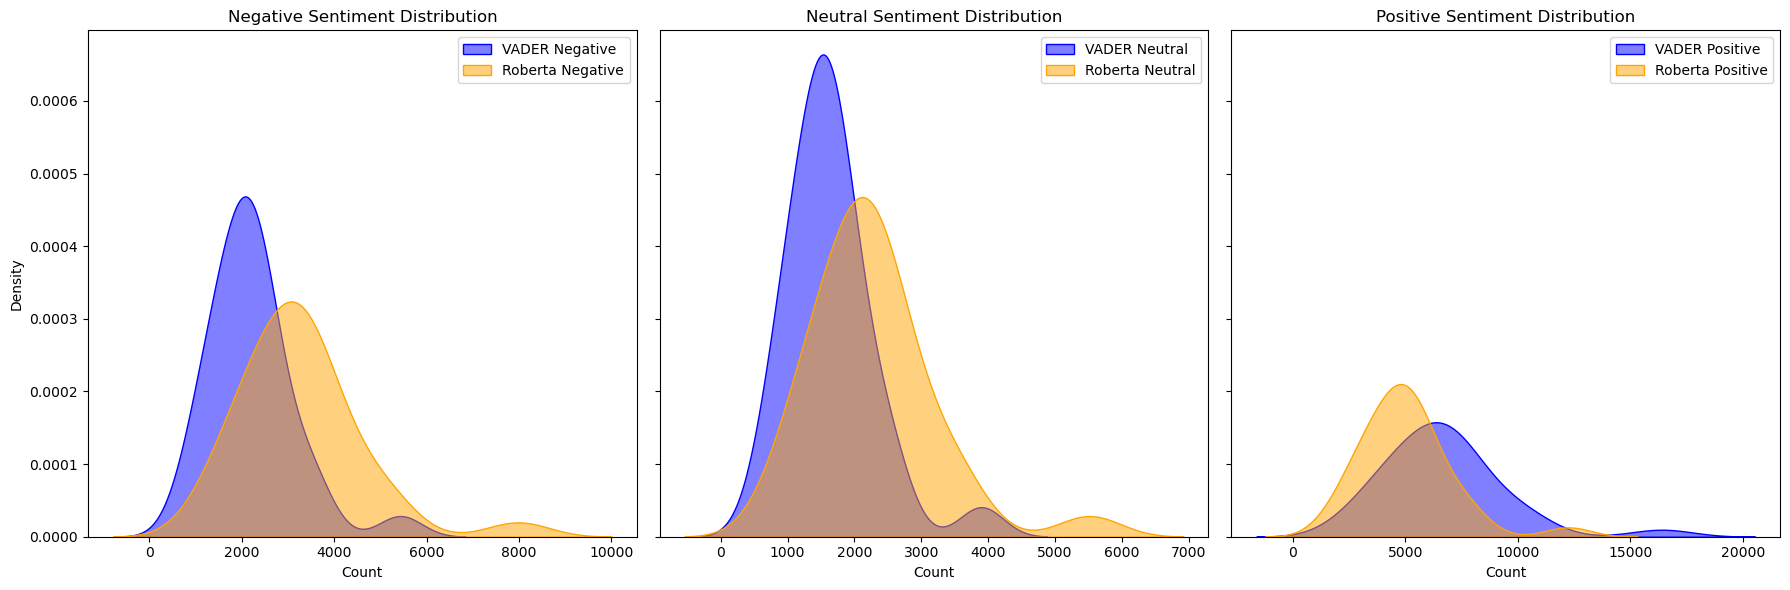

In [144]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Negative Counts
sns.kdeplot(agent_df['vader_neg_count'], ax=axs[0], label='VADER Negative', color='blue', fill=True, alpha=0.5)
sns.kdeplot(agent_df['roberta_neg_count'], ax=axs[0], label='Roberta Negative', color='orange', fill=True, alpha=0.5)
axs[0].set_title('Negative Sentiment Distribution')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Density')
axs[0].legend()

# Plot for Neutral Counts
sns.kdeplot(agent_df['vader_neu_count'], ax=axs[1], label='VADER Neutral', color='blue', fill=True, alpha=0.5)
sns.kdeplot(agent_df['roberta_neu_count'], ax=axs[1], label='Roberta Neutral', color='orange', fill=True, alpha=0.5)
axs[1].set_title('Neutral Sentiment Distribution')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Density')
axs[1].legend()

# Plot for Positive Counts
sns.kdeplot(agent_df['vader_pos_count'], ax=axs[2], label='VADER Positive', color='blue', fill=True, alpha=0.5)
sns.kdeplot(agent_df['roberta_pos_count'], ax=axs[2], label='Roberta Positive', color='orange', fill=True, alpha=0.5)
axs[2].set_title('Positive Sentiment Distribution')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Density')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\anikb\AppData\Local\Temp\ipykernel_16632\2568427705.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot_data, x='Category', y='Count', palette='Set2')


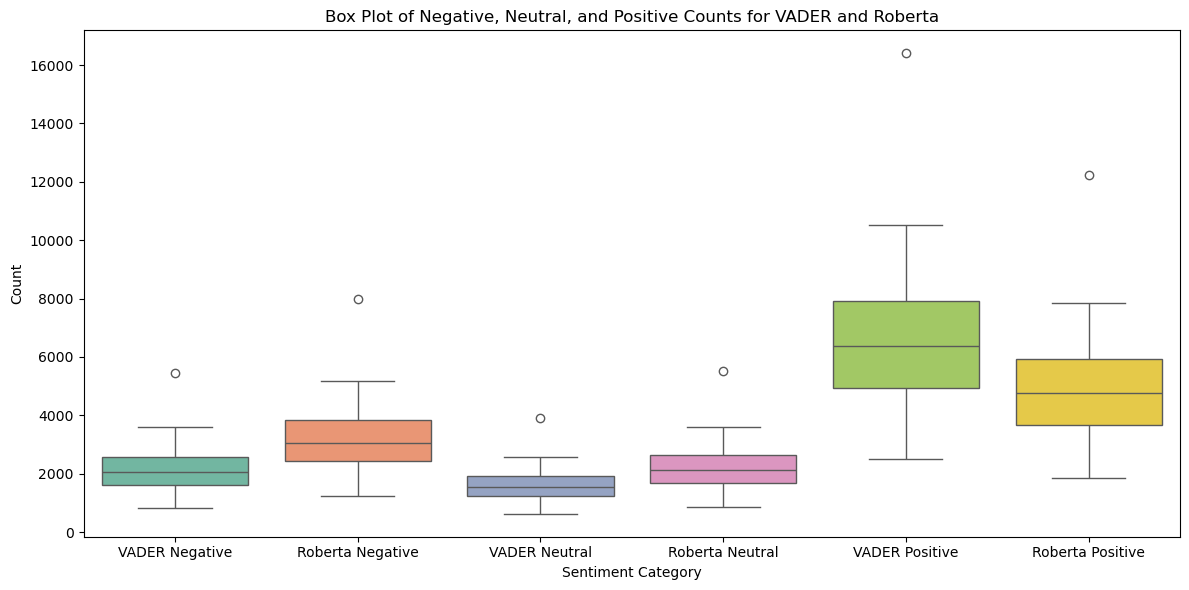

In [145]:
# Prepare the data in long format for box plot
boxplot_data = pd.DataFrame({
    'VADER Negative': agent_df['vader_neg_count'],
    'Roberta Negative': agent_df['roberta_neg_count'],
    'VADER Neutral': agent_df['vader_neu_count'],
    'Roberta Neutral': agent_df['roberta_neu_count'],
    'VADER Positive': agent_df['vader_pos_count'],
    'Roberta Positive': agent_df['roberta_pos_count']
}).melt(var_name='Category', value_name='Count')

# Create the box plotp
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data, x='Category', y='Count', palette='Set2')
plt.title('Box Plot of Negative, Neutral, and Positive Counts for VADER and Roberta')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Model Performance Evaluation Summary:

After analyzing the performance differences between agents using the VADER and RoBERTa models, we find that their overall performance is quite similar. However, there are significant changes in sentiment classification when using the RoBERTa model.

Specifically, we observe the following changes in interaction rates:

- Positive interaction rates decreased, ranging from 46% to 49%, which represents an average drop of 16% compared to the VADER model.
- Neutral interaction rates increased, ranging from 21% to 22%, showing an average increase of 5% compared to the VADER model.
- Negative interaction rates rose, ranging from 30% to 32%, indicating an average increase of 10% compared to the VADER model.

These shifts highlight important differences in sentiment analysis outcomes between the two models.

In [162]:
final_sentiments_df = final_sentiments_df.merge(
    df_with_sentiments[['processed_text']], 
    left_index=True, 
    right_index=True, 
    how='left'
)

In [168]:
final_sentiments_df.head(2)

,interaction_id,from_email_id,to_email_id,interaction_date,interaction_type,interaction_text,email_username,number_of_characters,number_of_words,number_of_sentences,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,roberta_neg,roberta_neu,roberta_pos,roberta_sentiment,processed_text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,gladys,359,64,5,0.039,0.722,0.238,0.9176,Positive,0.001614,0.006255,0.992132,Positive,thoroughly enjoyed presentation yesterday even...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,donn,266,54,2,0.000,0.837,0.163,0.8126,Positive,0.000866,0.014583,0.984551,Positive,speaking staff tremendous opportunity present ...


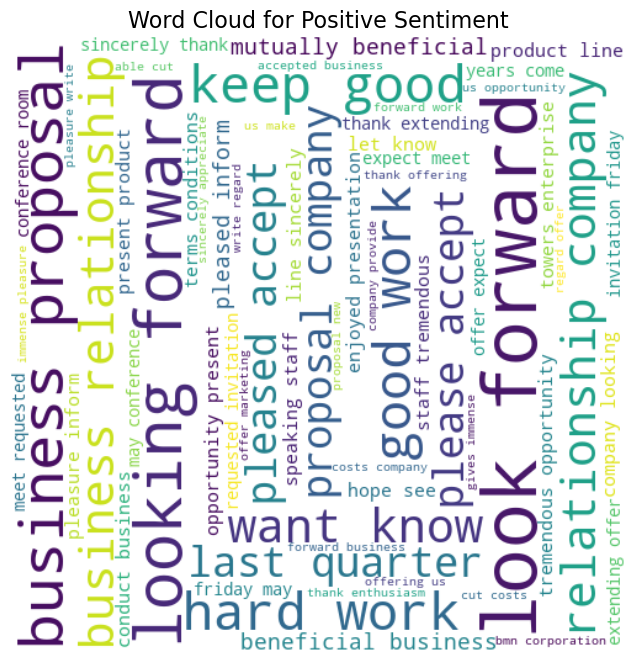

In [221]:
# Initialize the WordCloud object with desired parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

# Convert 'processed_text' to strings and concatenate into a single text for 'Positive' sentiment
positive_text = final_sentiments_df[final_sentiments_df['roberta_sentiment'] == 'Positive']['processed_text'].str.cat(sep=" ")

# Generate the word cloud
positive_text_wordcloud = wc.generate(positive_text)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(positive_text_wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

C:\Users\anikb\AppData\Local\Temp\ipykernel_16632\3414163820.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_10_positive_words, palette='viridis')


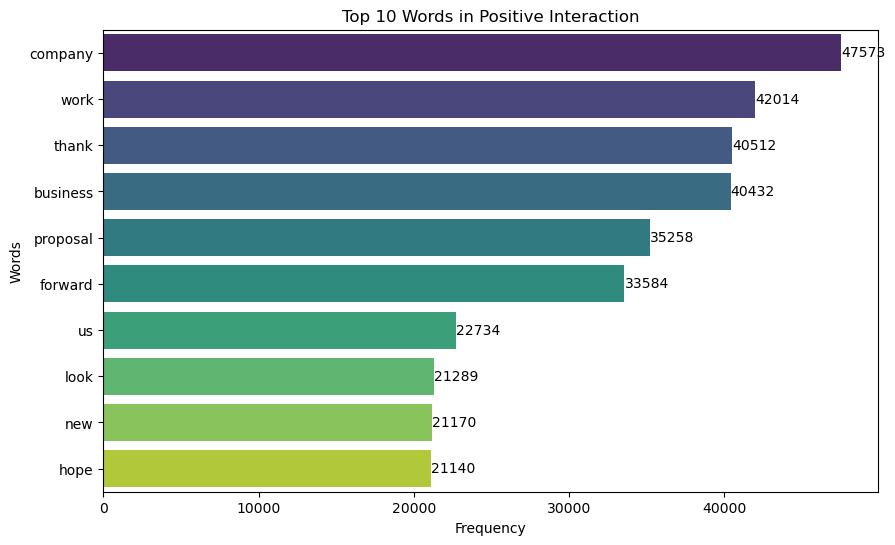

In [235]:
from collections import Counter

# Create a list of all words from spam messages
corpus = []
for msg in final_sentiments_df[final_sentiments_df['roberta_sentiment'] == 'Positive']['processed_text'].astype(str).tolist():
    for word in msg.split():
        corpus.append(word)
        
# Count word occurrences and convert to DataFrame
top_10_positive_words = pd.DataFrame(Counter(corpus).most_common(10), columns=['word', 'count'])

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_10_positive_words, palette='viridis')
plt.title('Top 10 Words in Positive Interaction')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Add data labels to each bar
for index, value in enumerate(top_10_positive_words['count']):
    plt.text(value, index, str(value), va='center')
    
plt.show()

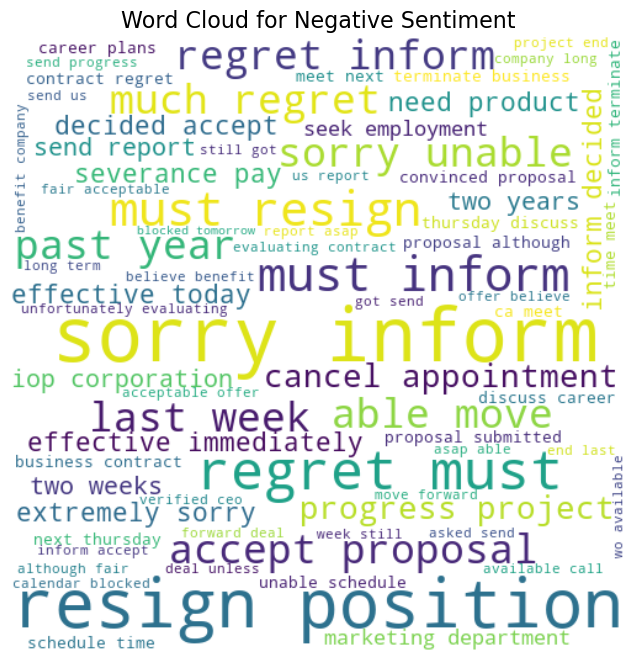

In [229]:
# Initialize the WordCloud object with desired parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

# Convert 'processed_text' to strings and concatenate into a single text for 'Positive' sentiment
negative_text = final_sentiments_df[final_sentiments_df['roberta_sentiment'] == 'Negative']['processed_text'].str.cat(sep=" ")

# Generate the word cloud
negative_text_wordcloud = wc.generate(negative_text)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(negative_text_wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

C:\Users\anikb\AppData\Local\Temp\ipykernel_16632\135592552.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_10_negative_words, palette='viridis')


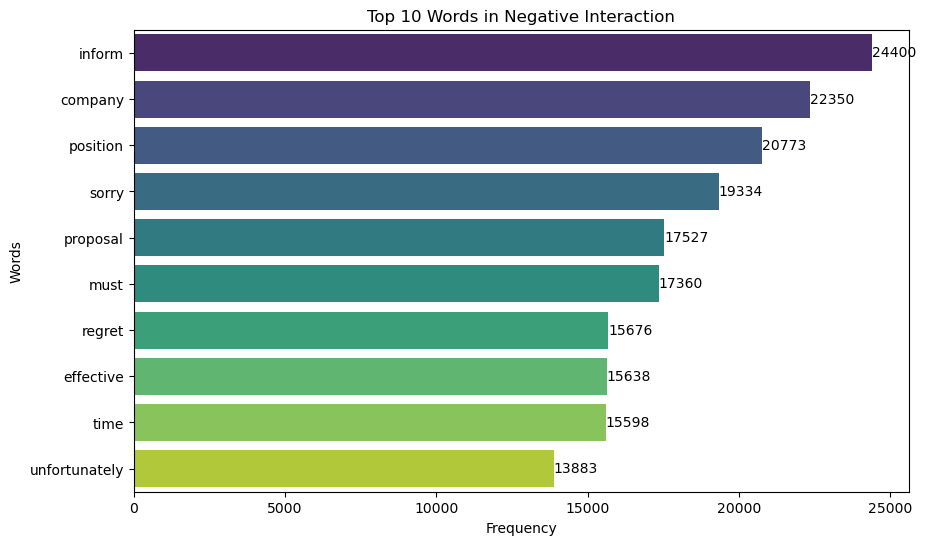

In [237]:
from collections import Counter

# Create a list of all words from spam messages
corpus = []
for msg in final_sentiments_df[final_sentiments_df['roberta_sentiment'] == 'Negative']['processed_text'].astype(str).tolist():
    for word in msg.split():
        corpus.append(word)
        
# Count word occurrences and convert to DataFrame
top_10_negative_words = pd.DataFrame(Counter(corpus).most_common(10), columns=['word', 'count'])

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_10_negative_words, palette='viridis')
plt.title('Top 10 Words in Negative Interaction')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Add data labels to each bar
for index, value in enumerate(top_10_negative_words['count']):
    plt.text(value, index, str(value), va='center')
    
plt.show()

In [176]:
final_sentiments_df.columns

Index(['interaction_id', 'from_email_id', 'to_email_id', 'interaction_date',
       'interaction_type', 'interaction_text', 'email_username',
       'number_of_characters', 'number_of_words', 'number_of_sentences',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'vader_sentiment', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'roberta_sentiment', 'processed_text'],
      dtype='object')

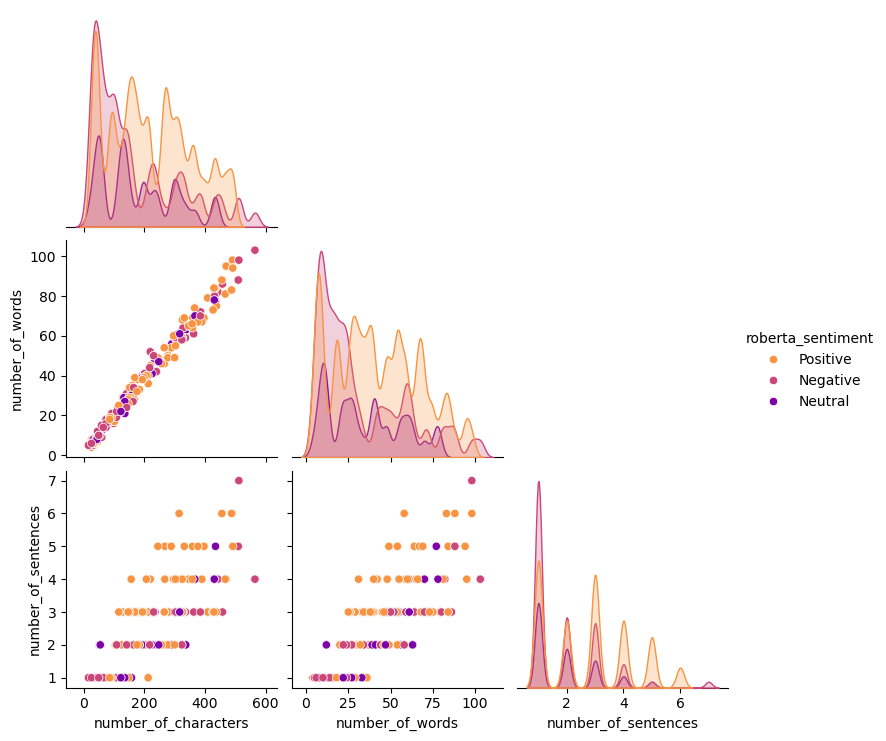

In [180]:
pairplot_df = final_sentiments_df[['number_of_characters', 'number_of_words', 'number_of_sentences','roberta_sentiment']]

# Plot pairwise relationships between numeric features, grouped by interaction_type, excluding interaction_id.
sns.pairplot(pairplot_df, hue='roberta_sentiment', palette='plasma_r', corner=True)

In [194]:
# Sum the 'number_of_sentences' column grouped by 'roberta_sentiment'
sentence_sum_by_sentiment = final_sentiments_df.groupby('roberta_sentiment')['number_of_sentences'].median()

sentence_sum_by_sentiment

roberta_sentiment
Negative    1.0
Neutral     1.0
Positive    3.0
Name: number_of_sentences, dtype: float64